AOMIC_ID1000
922
eNKI
813
CamCAN
650
SALD
494
1000Brains
1134
GSP
1570
DLBS
315


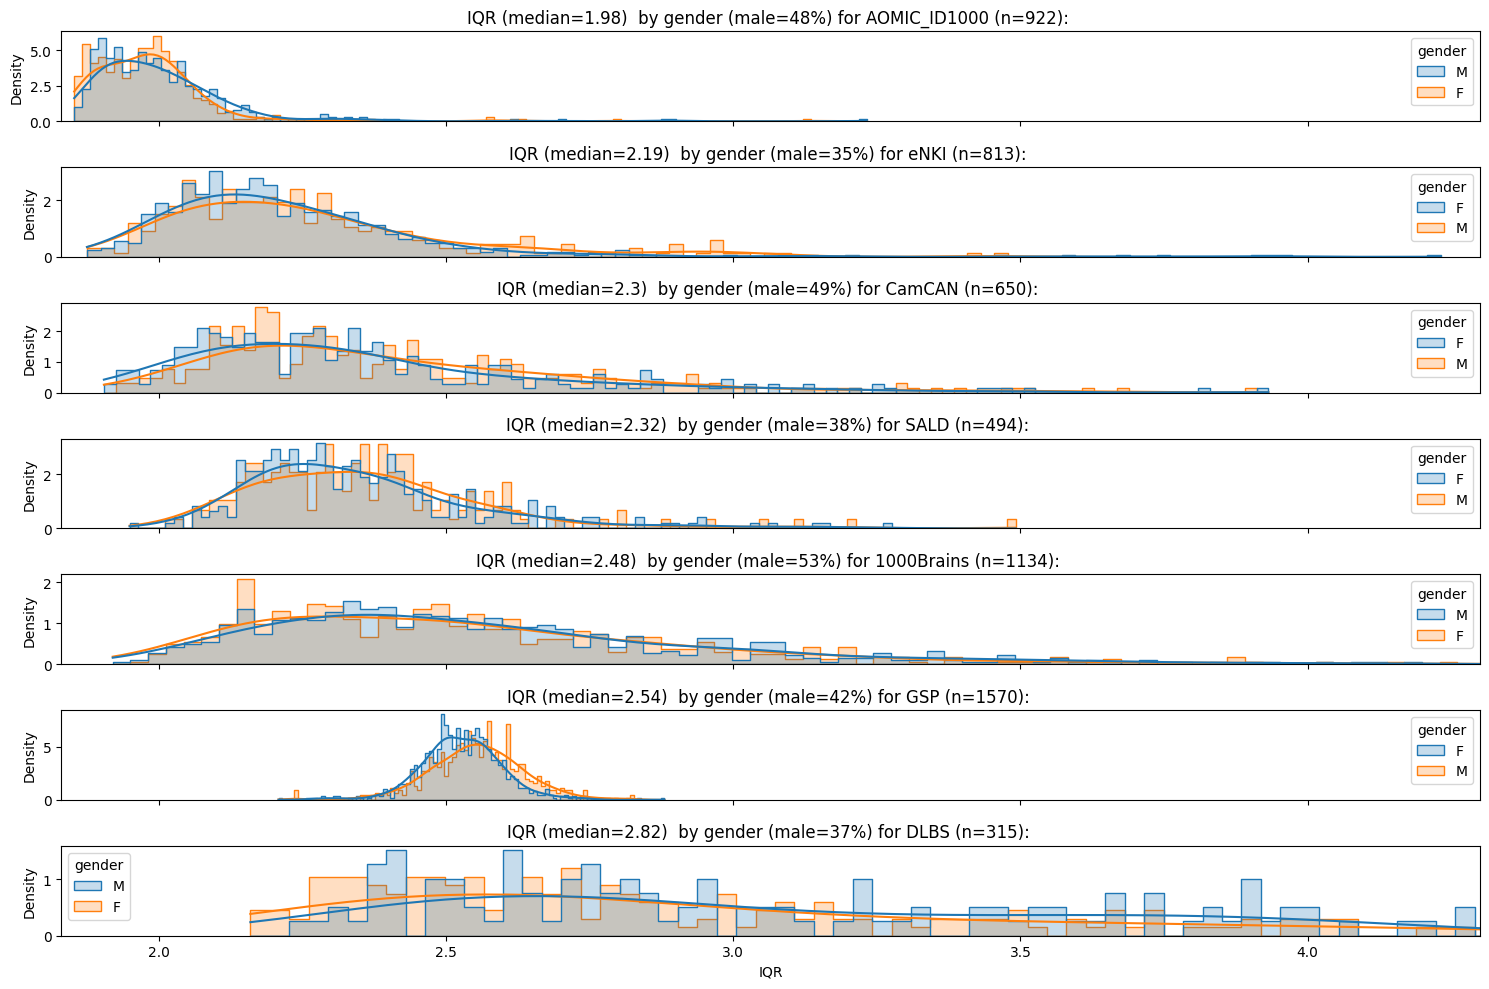

<Figure size 640x480 with 0 Axes>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy.stats as stats

sites = ["1000Brains", "SALD", "eNKI", "CamCAN","AOMIC_ID1000", ]
sites = [ "AOMIC_ID1000","eNKI","CamCAN", "SALD","1000Brains" ]
sites = [ "AOMIC_ID1000","eNKI","CamCAN", "SALD","1000Brains", "GSP", "DLBS" ]

data_dir = "../../data/"

# %%
# Main loop
fig, axes = plt.subplots(len(sites), 1, figsize=(15, 10), sharex=True)
for i, site in enumerate(sites):
    Y_data = pd.read_csv(data_dir + "Y_" + site + ".csv").dropna()
    print(site)
    print(len(Y_data))
    male_proportion = Y_data["gender"].value_counts(normalize=True).get('M', 0) * 100

    sbn.histplot(Y_data, x='IQR', hue='gender', kde=True, element='step', stat="density", common_norm=False, bins=100, ax=axes[i])
    axes[i].set_title(f'IQR (median={round(Y_data["IQR"].median(),2)})  by gender (male={round(male_proportion)}%) for {site} (n={len(Y_data)}): ')
    axes[i].set_xlabel('IQR')
    axes[i].set_ylabel('Density')
    axes[i].set_xlim(1.83, 4.3)
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

AOMIC_ID1000
922
min age
19.0
eNKI
813
min age
19.0
CamCAN
650
min age
18.0
SALD
494
min age
19
1000Brains
1134
min age
21.5
GSP
1570
min age
19
DLBS
315
min age
21.0


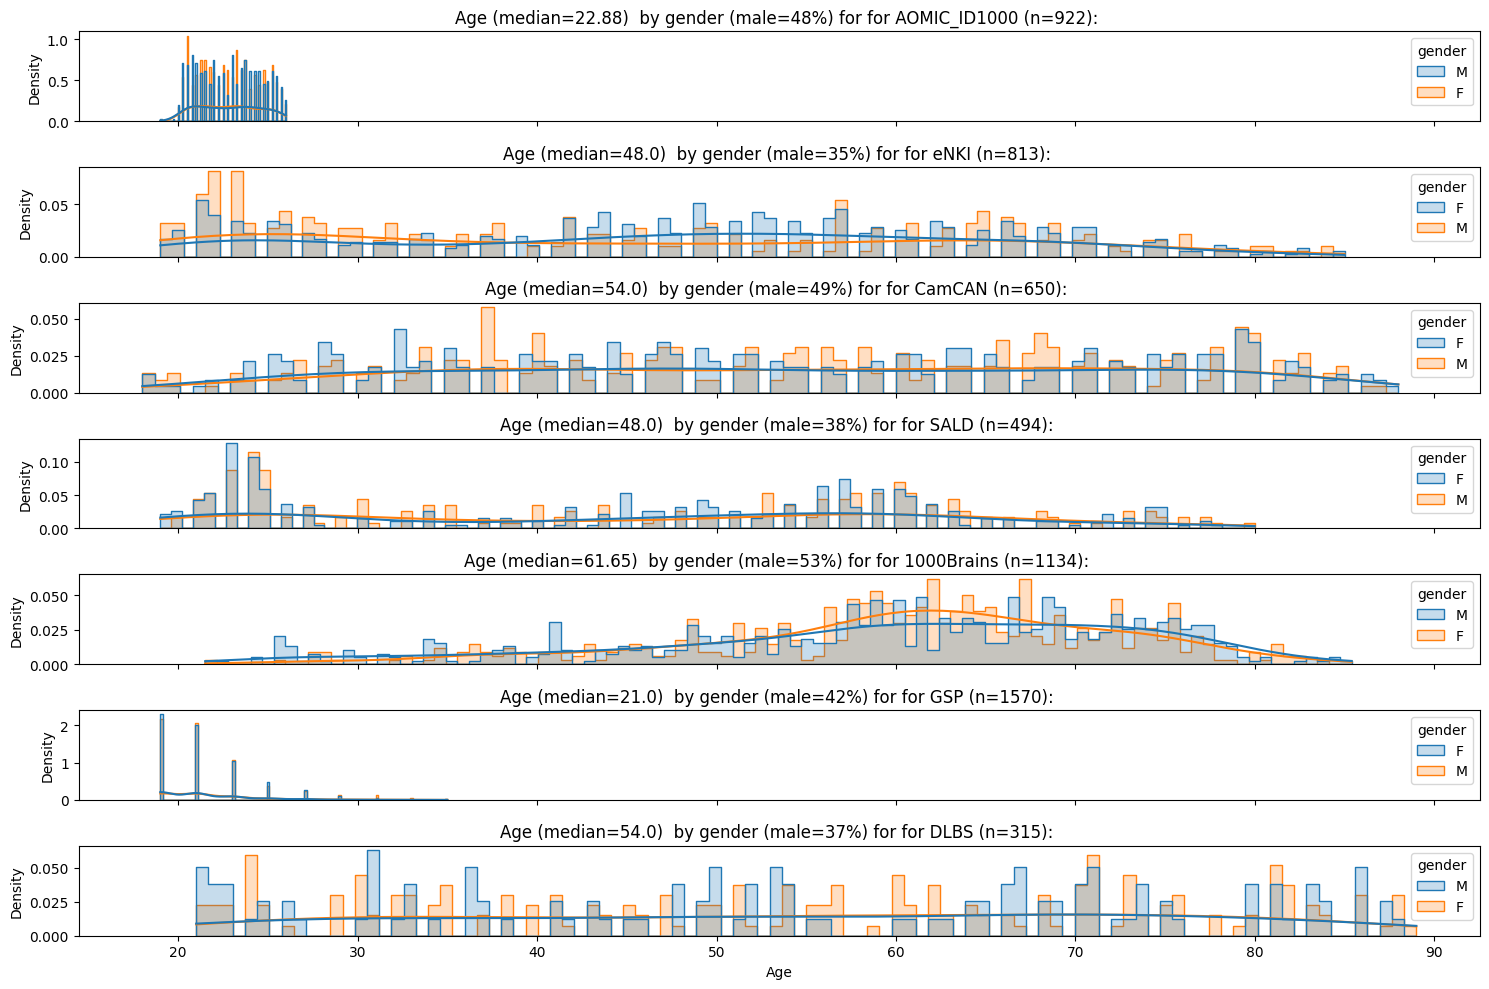

<Figure size 640x480 with 0 Axes>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy.stats as stats

sites = ["1000Brains", "SALD", "eNKI", "CamCAN","AOMIC_ID1000", ]
sites = [ "AOMIC_ID1000","eNKI","CamCAN", "SALD","1000Brains" ]
sites = [ "AOMIC_ID1000","eNKI","CamCAN", "SALD","1000Brains", "GSP", "DLBS" ]

data_dir = "../../data/"

# %%
# Main loop
fig, axes = plt.subplots(len(sites), 1, figsize=(15, 10), sharex=True)
for i, site in enumerate(sites):
    Y_data = pd.read_csv(data_dir + "Y_" + site + ".csv").dropna()
    print(site)
    print(len(Y_data))

    male_proportion = Y_data["gender"].value_counts(normalize=True).get('M', 0) * 100

    print("min age")
    print(Y_data["age"].min())
    sbn.histplot(Y_data, x='age', hue='gender', kde=True, element='step', stat="density", common_norm=False, bins=100, ax=axes[i])
    axes[i].set_title(f'Age (median={round(Y_data["age"].median(),2)})  by gender (male={round(male_proportion)}%) for for {site} (n={len(Y_data)}): ')
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel('Density')
plt.tight_layout()
plt.show()



plt.tight_layout()
plt.show()

In [ ]:
sampling_list = ["low_Q", "high_Q", "random_Q"]
from lib.data_loading import load_data_and_qc
from lib.data_processing import balance_data_age_gender_Qsampling
n_age_bins = 10
plt.figure(figsize=[15, 15])
print("hola")
for row, site in enumerate(sites):
    for col, sampling in enumerate(sampling_list):

        print(site)
        print(sampling)
        # Load data and prepare it
        X, Y = load_data_and_qc(site=site)

        # This is the main function to obtain different cohorts from the data
        X, Y = balance_data_age_gender_Qsampling(X, Y, n_age_bins, sampling)
        # plt.subplot(3, 3, i)

        # sbn.swarmplot(Y.IQR)
        # plt.title("QC data for site: "+site)
        # plt.ylabel("IQR")
        # plt.xlabel(sampling)
        # plt.ylim([1.5, 4.5])
        # plt.grid()
        print(Y.IQR.median())
        i = i+1

In [25]:

# Function to analyze differences by gender
def analyze_gender_differences(df):
    results = {}
    
    for col in ['IQR']:
        print(f"\nAnalyzing {col}:")
        male_data = df[df['gender'] == 'M'][col]
        female_data = df[df['gender'] == 'F'][col]
        
        # Step 1: Check Normality with Shapiro-Wilk Test
        male_normality_p = stats.shapiro(male_data)[1]
        female_normality_p = stats.shapiro(female_data)[1]
        normality = (male_normality_p > 0.05) and (female_normality_p > 0.05)
        print(f"  Normality - Male p-value: {male_normality_p}, Female p-value: {female_normality_p}")
        
        # Step 2: Check Homogeneity of Variances with Levene's Test
        levene_p = stats.levene(male_data, female_data)[1]
        equal_variance = levene_p > 0.05
        print(f"  Levene's test for equal variances - p-value: {levene_p}")
        
        # Step 3: Choose and Perform the Appropriate Test
        if normality:
            if equal_variance:
                # Use T-test
                stat, p_value = stats.ttest_ind(male_data, female_data, equal_var=True)
                test_used = "T-test (equal variances)"
            else:
                # Use Welch's T-test
                stat, p_value = stats.ttest_ind(male_data, female_data, equal_var=False)
                test_used = "Welch's T-test (unequal variances)"
        else:
            # Use Mann-Whitney U Test
            stat, p_value = stats.mannwhitneyu(male_data, female_data, alternative='two-sided')
            test_used = "Mann-Whitney U Test (non-normal distribution)"
        
        # Step 4: Interpret the Results
        significant = p_value < 0.05
        results[col] = {
            'test_used': test_used,
            'p_value': p_value,
            'significant': significant
        }
        print(f"  Test used: {test_used}, p-value: {p_value}, Significant: {significant}")
    
    return results

for i, site in enumerate(sites):
    print(site)
    Y_data = pd.read_csv(root_dir + "Y_" + site + ".csv")
    qc_data = pd.read_csv(qc_dir+site+"_cat12.8.1_rois_thalamus.csv")
    qc_data.rename(columns={"SubjectID": "subject"}, inplace=True)

    # For the naming exeptions
    if site == "eNKI":
        qc_data = qc_data[qc_data["Session"] == "ses-BAS1"]
    if site == "SALD":
        qc_data['subject'] = qc_data['subject'].str.replace('sub-', '')
        qc_data['subject'] = pd.to_numeric(qc_data['subject'])

    Y_data = pd.merge(Y_data, qc_data[['subject', 'IQR']],
                      on='subject', how='left')

    # Remove those subject without QC data
    Y_data = Y_data.dropna()
    # Run the analysis
    results = analyze_gender_differences(Y_data)

    # # Print final summary
    # print("\nFinal Results Summary:")
    # for run, res in results.items():
        # print(f"{run}:")
        # print(f"  Test used: {res['test_used']}")
        # print(f"  p-value: {res['p_value']}")
        # print(f"  Statistically Significant: {res['significant']}")


eNKI

Analyzing IQR:
  Normality - Male p-value: 9.299185092749226e-15, Female p-value: 2.8030498995018847e-29
  Levene's test for equal variances - p-value: 0.1993253154089208
  Test used: Mann-Whitney U Test (non-normal distribution), p-value: 0.05415120748029171, Significant: False
CamCAN

Analyzing IQR:
  Normality - Male p-value: 1.412984194302776e-14, Female p-value: 3.788697110845108e-16
  Levene's test for equal variances - p-value: 0.5301981132266712
  Test used: Mann-Whitney U Test (non-normal distribution), p-value: 0.00829382040307845, Significant: True
SALD

Analyzing IQR:
  Normality - Male p-value: 5.221835464030988e-11, Female p-value: 1.5676088899185814e-13
  Levene's test for equal variances - p-value: 0.7551079210139741
  Test used: Mann-Whitney U Test (non-normal distribution), p-value: 0.398598820200165, Significant: False


AOMIC_ID1000
922
min age
19.0
eNKI
813
min age
19.0
CamCAN
650
min age
18.0
SALD
494
min age
19
1000Brains
1134
min age
21.5
GSP
1570
min age
19
DLBS
315
min age
21.0


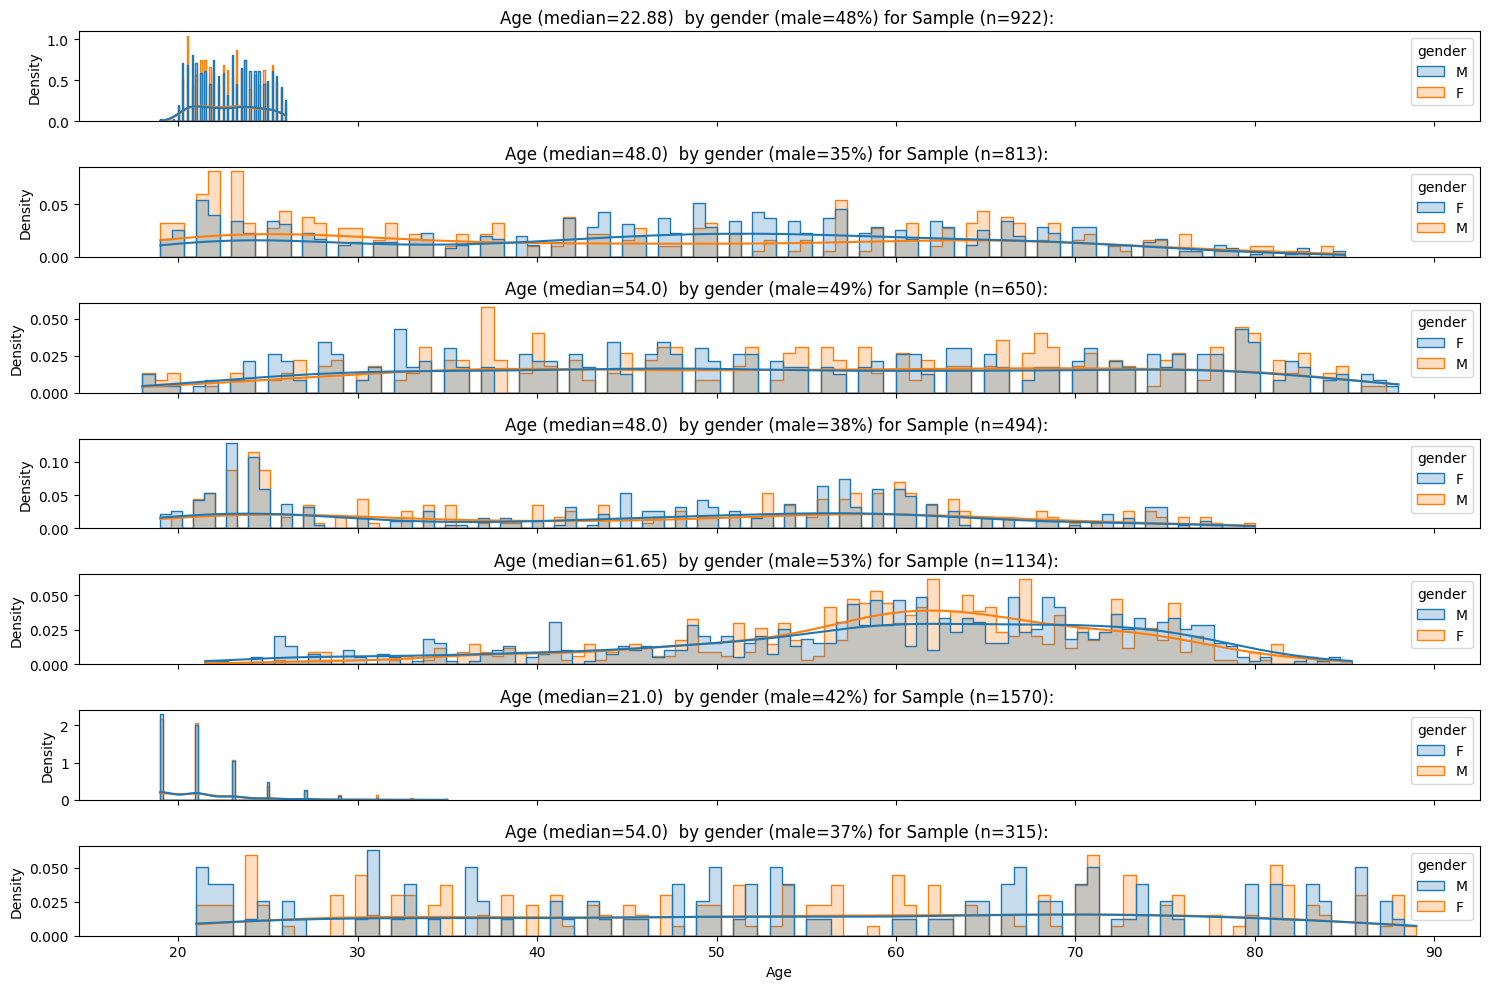

<Figure size 640x480 with 0 Axes>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy.stats as stats

sites = ["1000Brains", "SALD", "eNKI", "CamCAN","AOMIC_ID1000", ]
sites = [ "AOMIC_ID1000","eNKI","CamCAN", "SALD","1000Brains" ]
sites = [ "AOMIC_ID1000","eNKI","CamCAN", "SALD","1000Brains", "GSP", "DLBS" ]

data_dir = "../../data/"

# %%
# Main loop
fig, axes = plt.subplots(len(sites), 1, figsize=(15, 10), sharex=True)
for i, site in enumerate(sites):
    Y_data = pd.read_csv(data_dir + "Y_" + site + ".csv").dropna()
    print(site)
    print(len(Y_data))

    male_proportion = Y_data["gender"].value_counts(normalize=True).get('M', 0) * 100

    print("min age")
    print(Y_data["age"].min())
    sbn.histplot(Y_data, x='age', hue='gender', kde=True, element='step', stat="density", common_norm=False, bins=100, ax=axes[i])
    axes[i].set_title(f'Age (median={round(Y_data["age"].median(),2)})  by gender (male={round(male_proportion)}%) for Sample (n={len(Y_data)}): ')
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel('Density')
plt.tight_layout()
plt.show()



plt.tight_layout()
plt.show()